##**Unzipping the data file**

In [ ]:
import zipfile as z
zip_ref = z.ZipFile("/content/insurance.csv.zip.zip", "r") #the source path is given
zip_ref.extractall("/content/") #the destination part is given
zip_ref.close()

##**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##**Data Analysis & Visualisation**

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**It can be observed that there is no NaN value in the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
y={'southeast':0,'northwest':1,'southwest':2,'northeast':3}
df['region']=df['region'].map(y)

In [ ]:
z={'male':0,'female':1}
df['sex']=df['sex'].map(z)

In [ ]:
x={'yes':0,'no':1}
df['smoker']=df['smoker'].map(x)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


In [ ]:
df.groupby('region')['charges'].mean()


region
0    14735.411438
1    12417.575374
2    12346.937377
3    13406.384516
Name: charges, dtype: float64

In [ ]:
df.groupby('sex')['charges'].mean()

sex
0    13956.751178
1    12569.578844
Name: charges, dtype: float64

In [ ]:
df.groupby('smoker')['charges'].mean()

smoker
0    32050.231832
1     8434.268298
Name: charges, dtype: float64

In [ ]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [ ]:
df.groupby('bmi')['charges'].mean()

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.010265,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.010170,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.213489,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.000107,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.010265,0.010170,-0.213489,0.000107,0.038873,1.000000,-0.040728
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.040728,1.000000


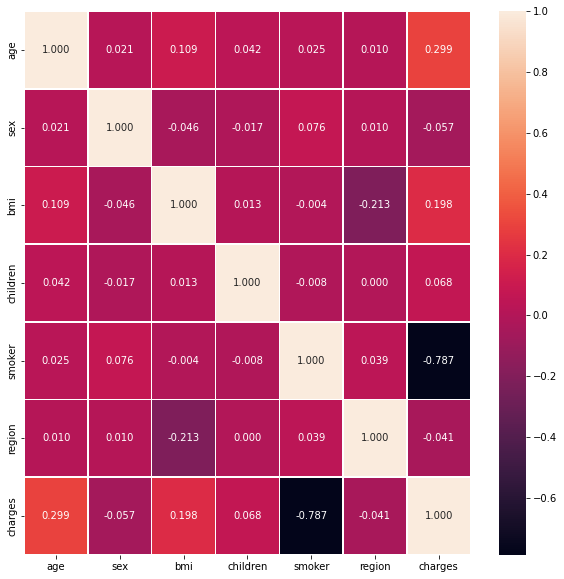

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

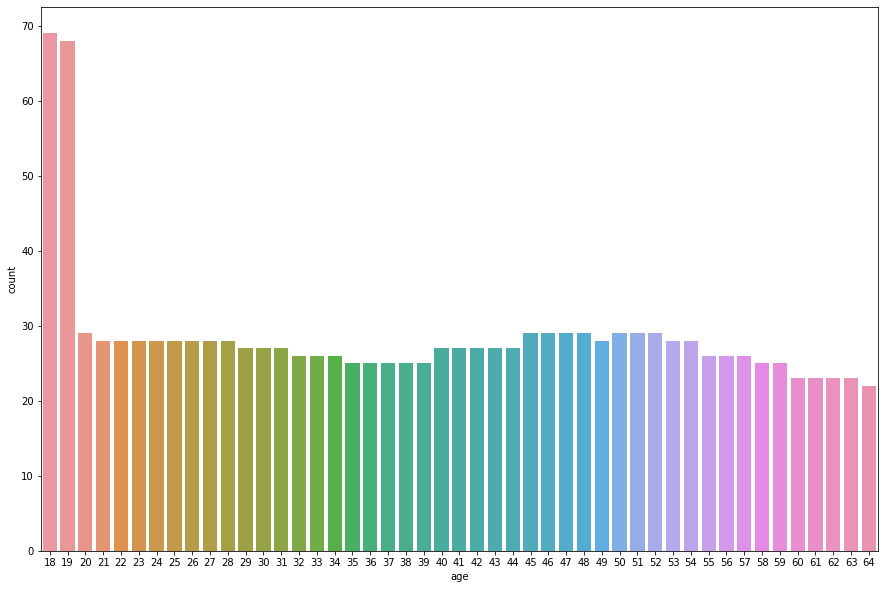

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='age', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


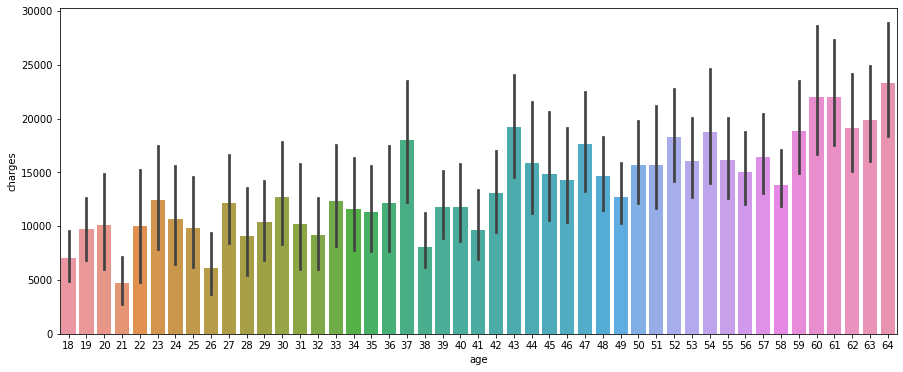

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('age','charges',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


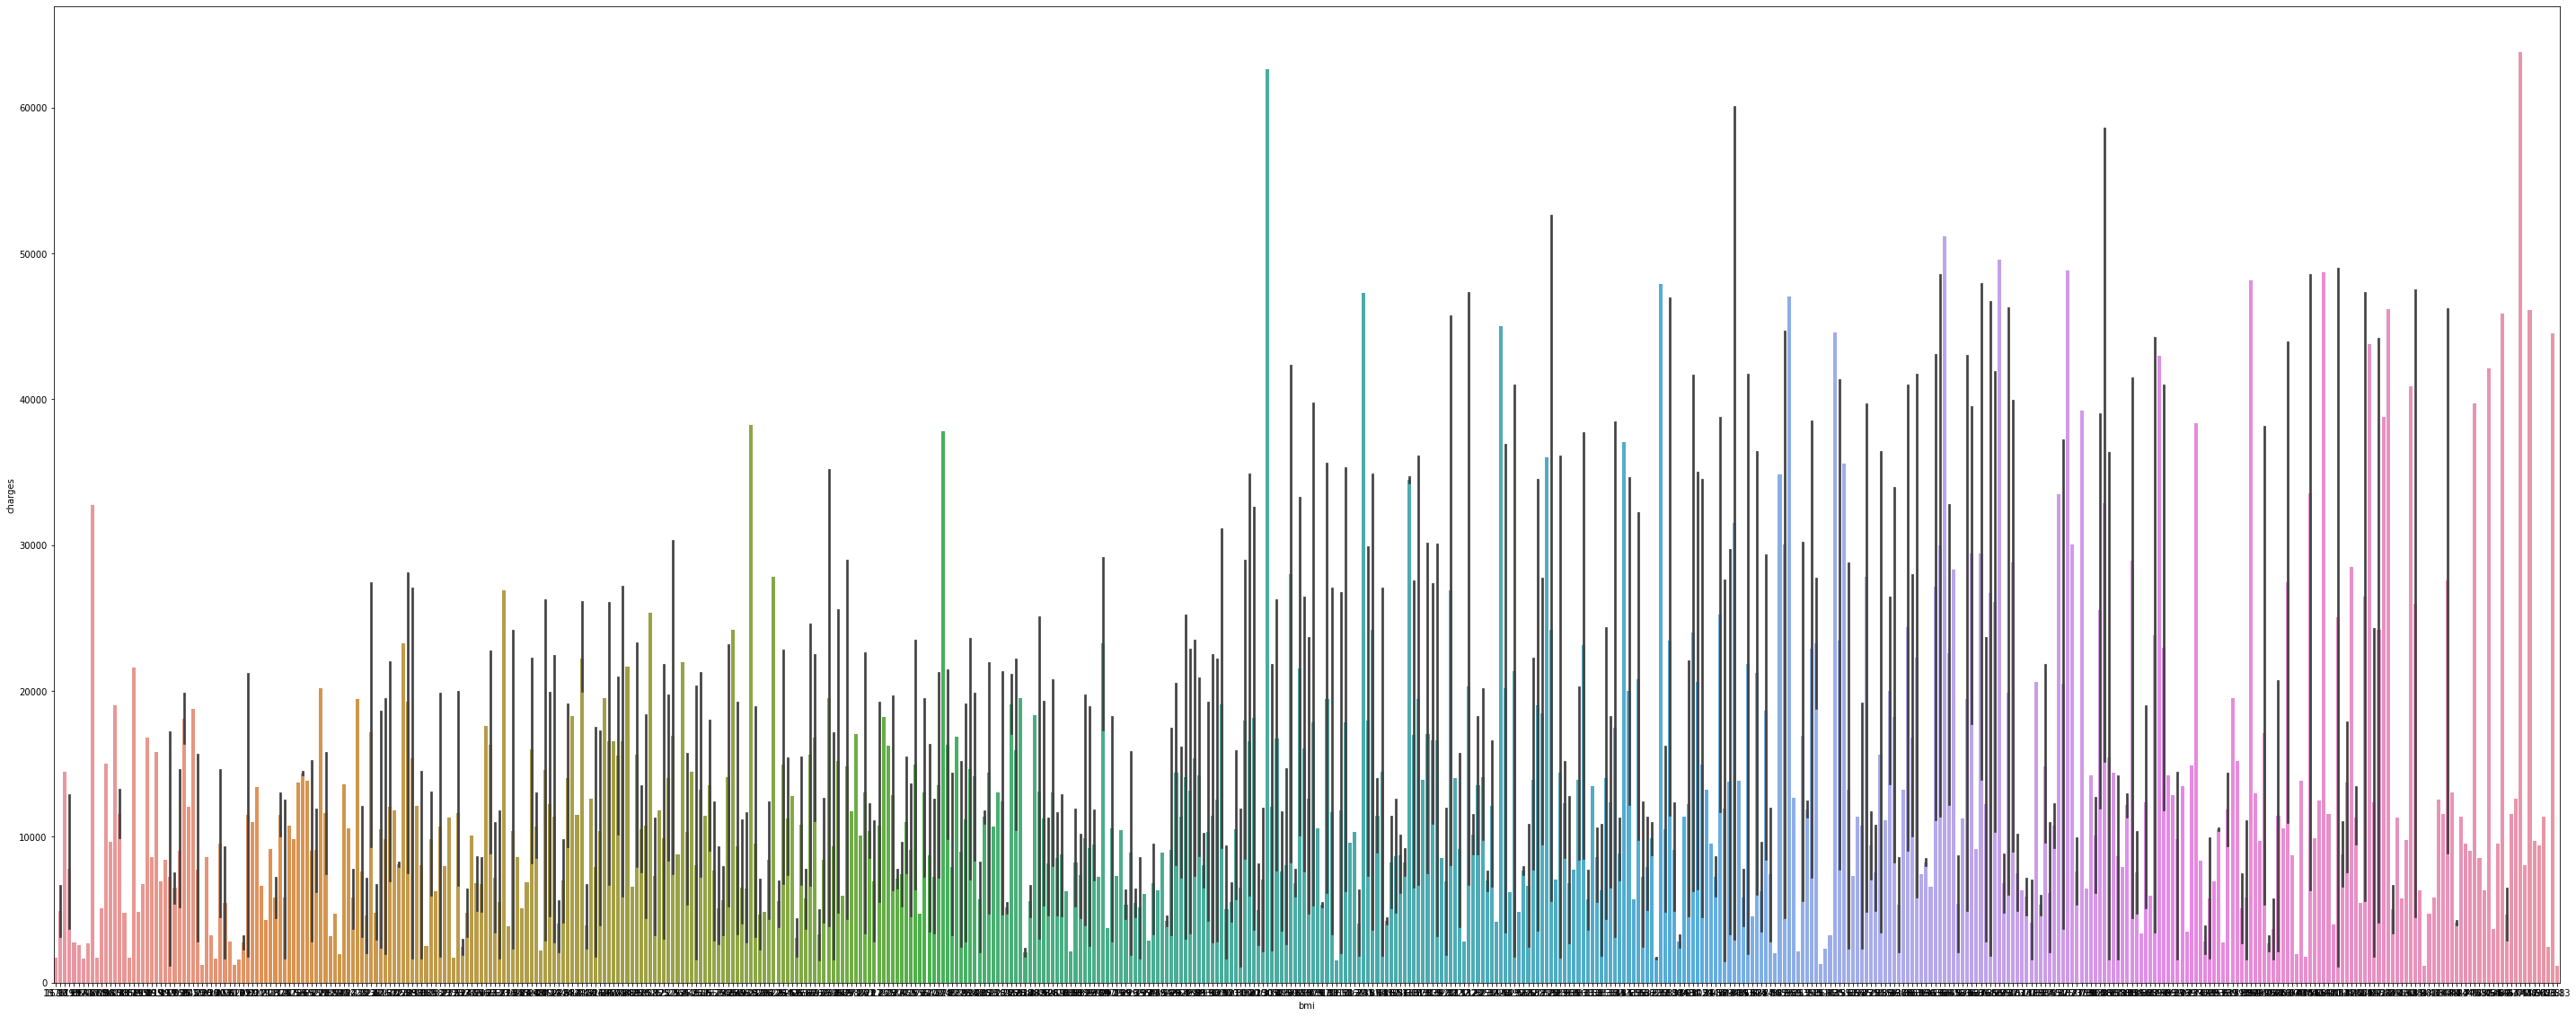

In [ ]:
plt.figure(figsize=(50,20))
sns.barplot('bmi','charges',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


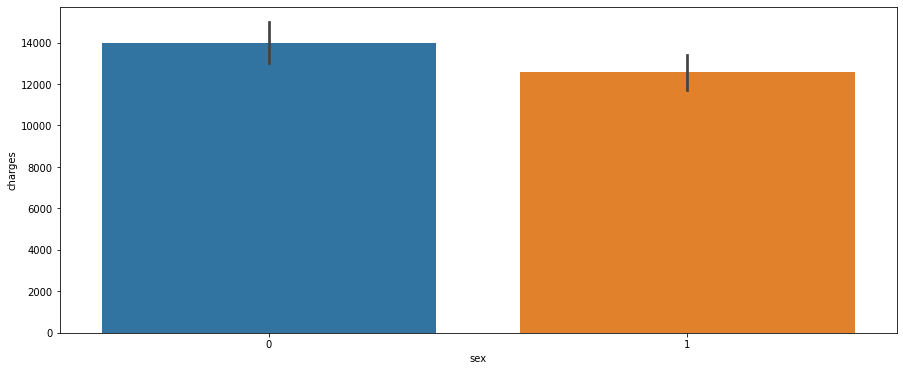

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('sex','charges',data=df)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


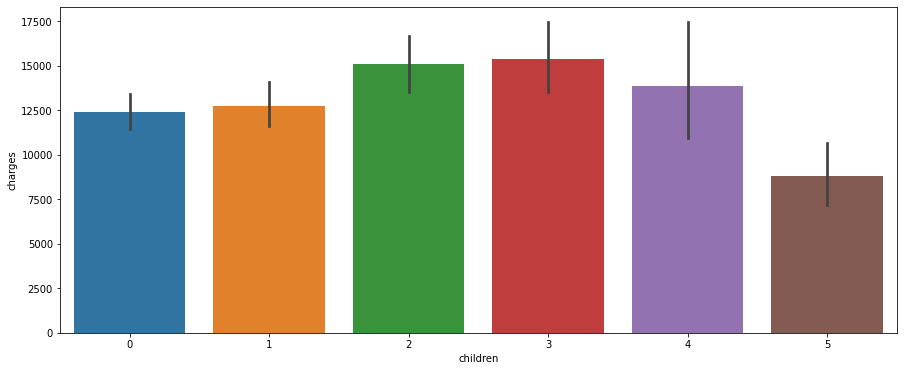

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('children','charges',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


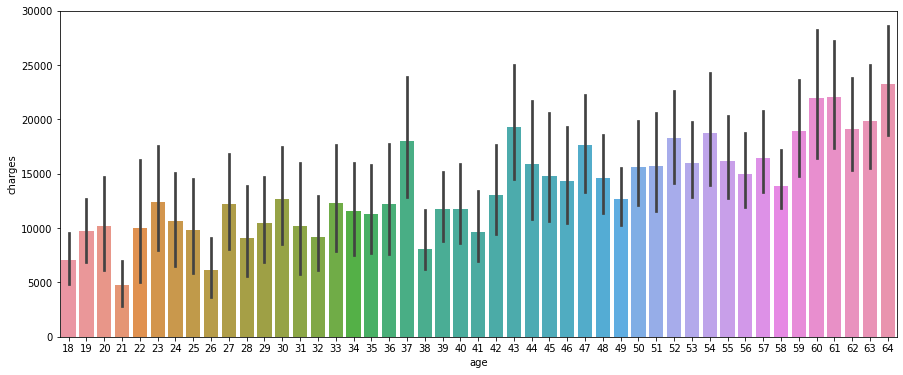

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('age','charges',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2160x432 with 0 Axes>

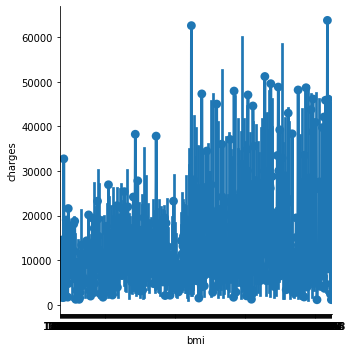

In [ ]:
plt.figure(figsize=(30,6))
sns.factorplot("bmi","charges",data=df)

In [ ]:
maxbmi = df['bmi'].max()
minbmi=df['bmi'].min()
print(minbmi)
print(maxbmi)

15.96
53.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


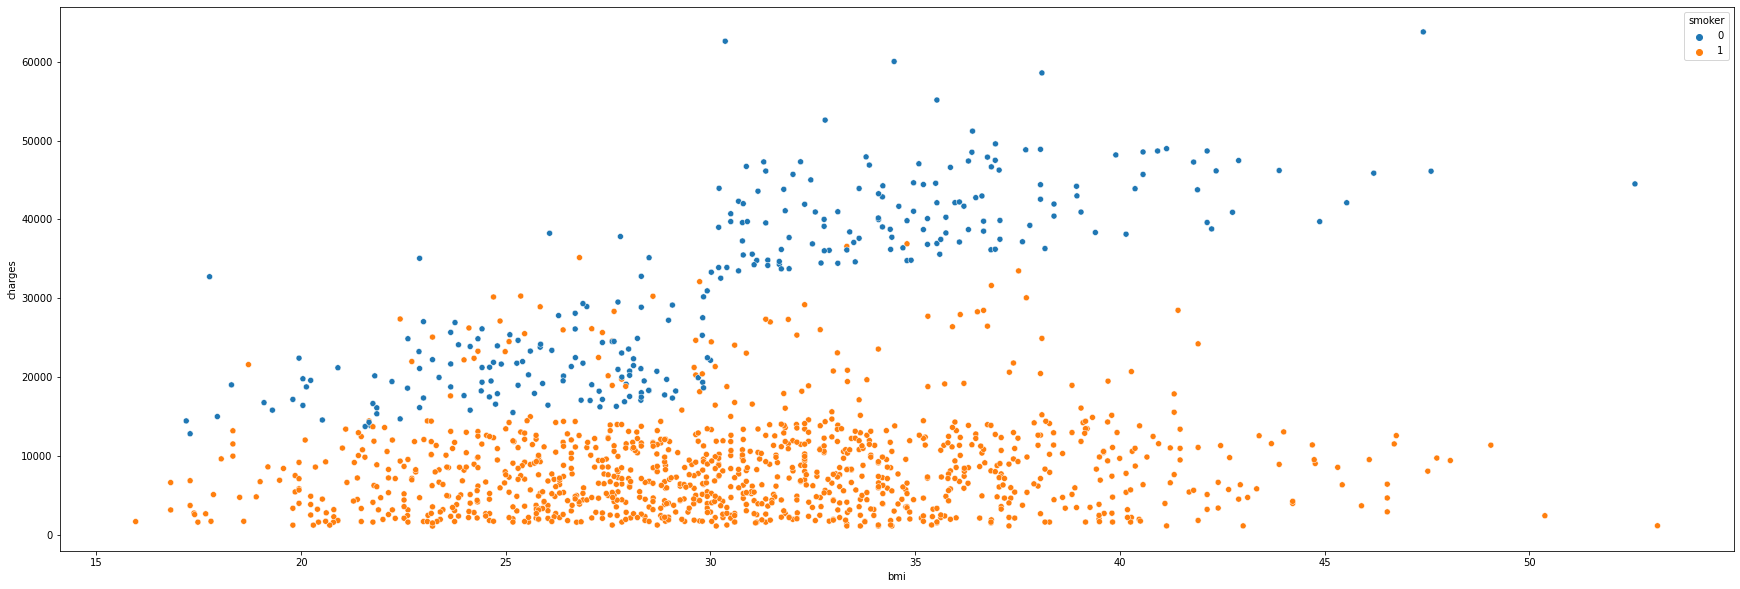

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot("bmi", "charges",hue='smoker',data=df)

trying to visualise any correlation between bmi and charges

<Figure size 2160x432 with 0 Axes>

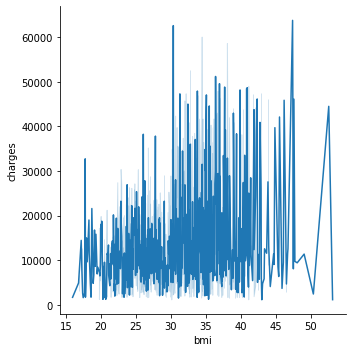

In [ ]:
plt.figure(figsize=(30,6))
sns.relplot(x="bmi", y="charges",kind='line',data=df);

In [ ]:
def metabolic_rate(parameters):
     
    b=parameters
    
    # introducing a new feature : the metabolic rate
    metabolic_rate = b
    
    if (metabolic_rate <=30.0000):
      return 1 # for low bmi
  
    else:
        return 2 #for high bmi 

In [ ]:
df['metabolism']=df['bmi'].apply(metabolic_rate)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,metabolism
0,19,1,27.900,0,0,2,16884.92400,1
1,18,0,33.770,1,1,0,1725.55230,2
2,28,0,33.000,3,1,0,4449.46200,2
3,33,0,22.705,0,1,1,21984.47061,1
4,32,0,28.880,0,1,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830,2
1334,18,1,31.920,0,1,3,2205.98080,2
1335,18,1,36.850,0,1,0,1629.83350,2
1336,21,1,25.800,0,1,2,2007.94500,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   int64  
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   int64  
 5   region      1338 non-null   int64  
 6   charges     1338 non-null   float64
 7   metabolism  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


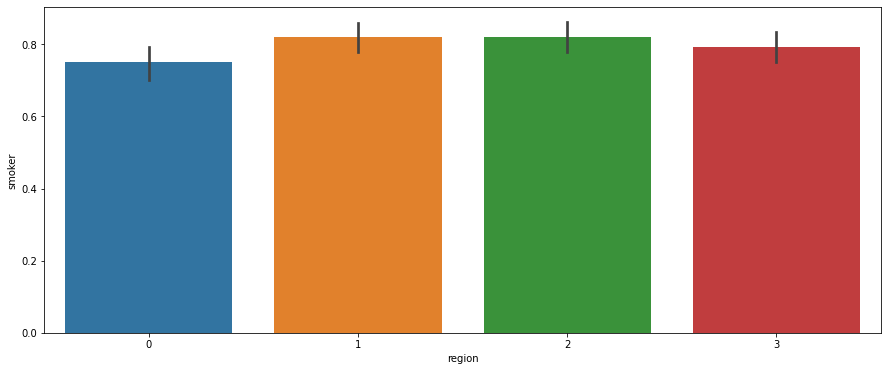

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('region','smoker',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


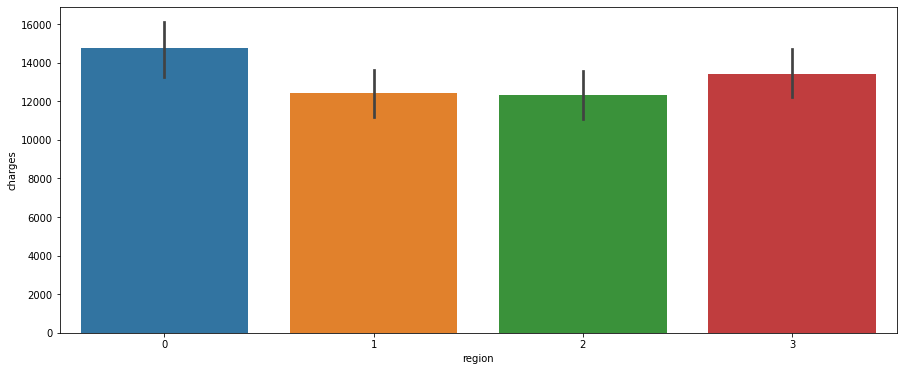

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('region','charges',data=df)

In [ ]:
df=df.drop('metabolism',axis=1)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


as there is no visible pattern between high or low metabolism with charges,so we are dropping the 'metabolism' column created by us

##**Building the model**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('charges',axis=1)
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


In [ ]:
X_train.shape

(936, 6)

In [ ]:
y_train.shape

(936,)

In [ ]:
X_test.shape

(402, 6)

In [ ]:
y_test.shape

(402,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

linear regression

In [ ]:
lr = LinearRegression() #create the object of the model
lr=lr.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
pred = lr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 4256.531912019852
The MsE with the linear regressor is: 37889111.11837336
The R2_Score with the linear regressor is: 0.7510087287805018


Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor() #create the object of the model
dtr=dtr.fit(X_train,y_train)

In [ ]:
pred = dtr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 3006.048039427861
The MsE with the DT regressor is: 41569268.96495641
The R2_Score with the DT regressor is: 0.7268242822875153


Random Forest Regressor

In [ ]:
r = RandomForestRegressor() #create the object of the model
r=r.fit(X_train,y_train)

In [ ]:
pred = r.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 2767.282454579925
The MsE with the RF regressor is: 22643314.374952767
The R2_Score with the RF regressor is: 0.8511976801665261


XGB Regressor

In [ ]:
xgb=XGBRegressor()
xgb=xgb.fit(X_train,y_train)

[06:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred = xgb.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the XGB regressor is: "+str(s))
print("The MsE with the XGB regressor is: "+str(s1))
print("The R2_Score with the XGB regressor is: "+str(s2))

The MAE with the XGB regressor is: 2606.3160051390505
The MsE with the XGB regressor is: 19655043.14662783
The R2_Score with the XGB regressor is: 0.8708353393759148


From all the models, XGBregressor gave the minimum error, So thats the best model and should be chosen as the final model...

[ ]
